In [2]:
import numpy as np
import pandas as pd

from IPython.display import Audio, display
def allDone():
    urL = 'http://www.wavsource.com/snds_2020-03-30_7102365145747638/animals/cat_meow2.wav'
    display(Audio(url=urL, autoplay=True))
    
allDone()

In [3]:
motifs = np.genfromtxt('data__for_nerds/motifs.csv',dtype='U')
motifxFamMatrix = np.genfromtxt('data__for_nerds/motifxFamMatrix.csv',delimiter=',',dtype=int)
fams = np.genfromtxt('data__for_nerds/fams.csv',dtype='U')

len(motifs)

7866

In [4]:
def get_trigram_seq(motif):
    trigram_seq = []
    for i in range(len(motif)-2):
        trigram = motif[i:i+3]
        trigram_seq.append(trigram)
    return trigram_seq
# print(get_trigram_seq("TTAVEIDYDSLKLKK"))

In [6]:
n_grams = np.genfromtxt('data_raw__for_nerds/protVec_100d_3grams.csv',dtype='U')[:,0]
protvec_matrix = np.genfromtxt('data_raw__for_nerds/protVec_100d_3grams.csv',dtype=float)[:,1:]

nGram_to_vec = {n_gram:0 for n_gram in n_grams}

for i,n_gram in enumerate(n_grams):
    nGram_to_vec[n_gram] = protvec_matrix[i]
# print( next(iter(nGram_to_vec.values())) )

In [7]:
motif_vecs = []
for motif in motifs:
    trigrammed = get_trigram_seq(motif)
    motif_vec = []
    for trigram in trigrammed:
        if '_' in trigram:
            motif_vec.append(nGram_to_vec['<unk>'])
        else:
            motif_vec.append(nGram_to_vec[trigram])
    motif_vec = np.array((motif_vec)).ravel()
    motif_vecs.append(motif_vec)
motif_vecs = np.stack( motif_vecs )
print(motif_vecs.shape)

(7866, 1300)


In [8]:
df = pd.DataFrame(motif_vecs,dtype=float)
df.to_csv("data__for_nerds/protvec_embedding.csv",header=None,index=None)

## Let's see what the embedding looks like !

In [67]:
import umap.umap_ as umap
import time

umapper = umap.UMAP(
    n_neighbors=200,
    min_dist=0.1,
    n_components=2,
    metric='euclidean' )

s = time.time()
pos_umap = umapper.fit_transform(motif_vecs)

print ("secs: %5.3f" % (time.time()-s))
allDone()

/usr/local/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../usr/local/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/usr/local/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../usr/local/anaconda3/lib/python3.7/site-package

secs: 63.500


In [68]:
import os
f = 'FIGS_protvec/'
os.mkdir(f)

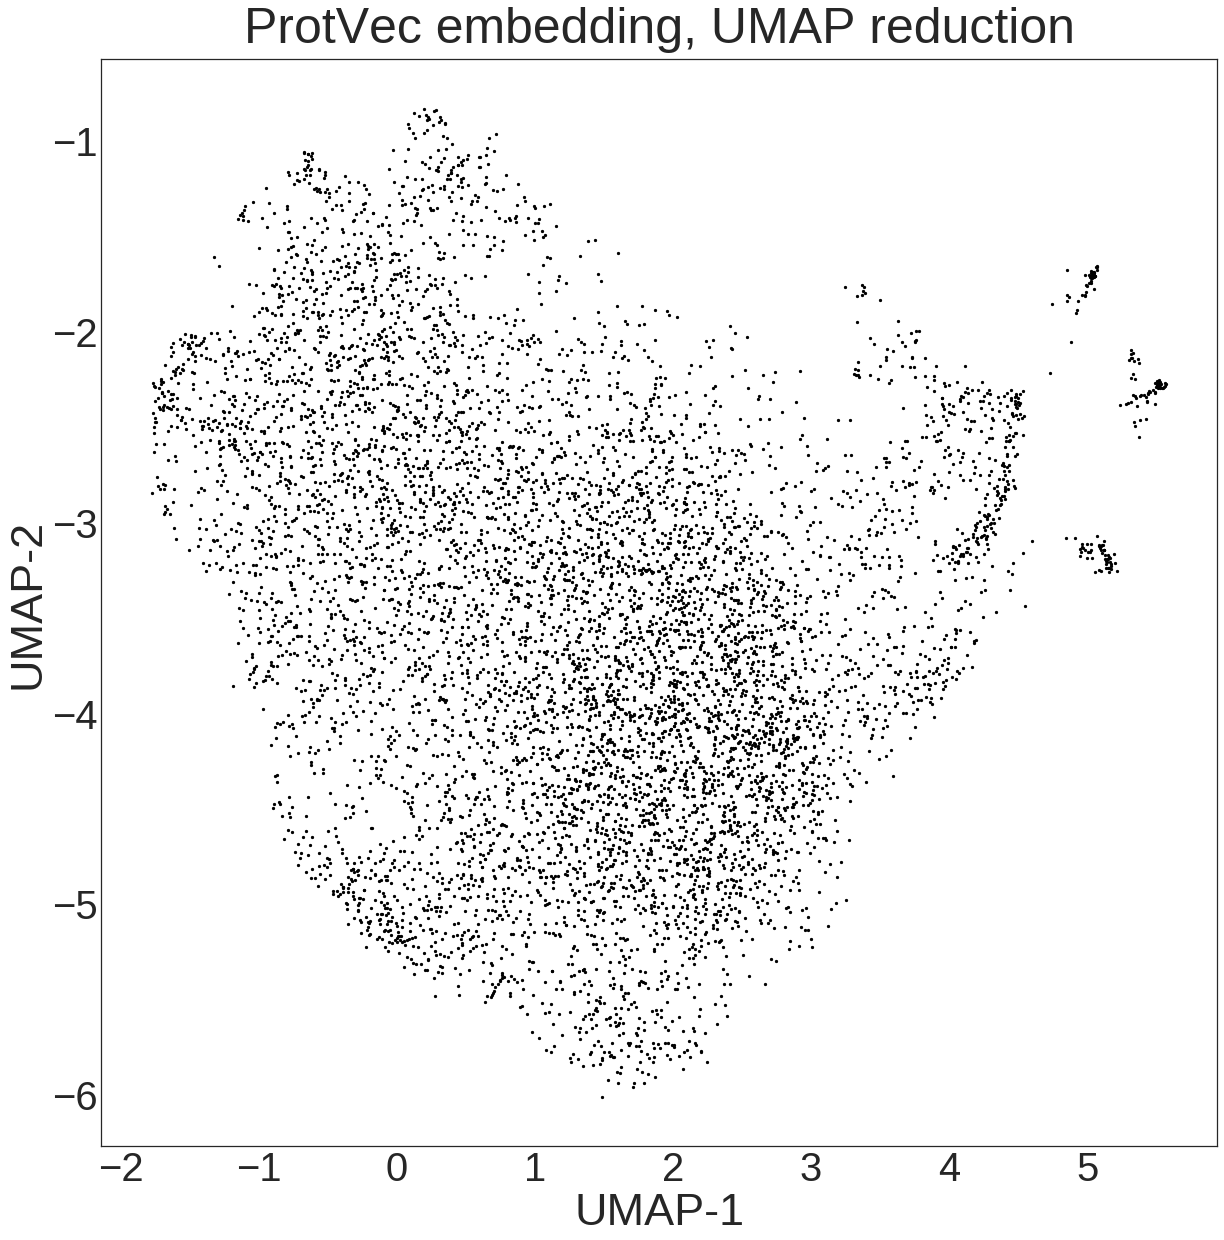

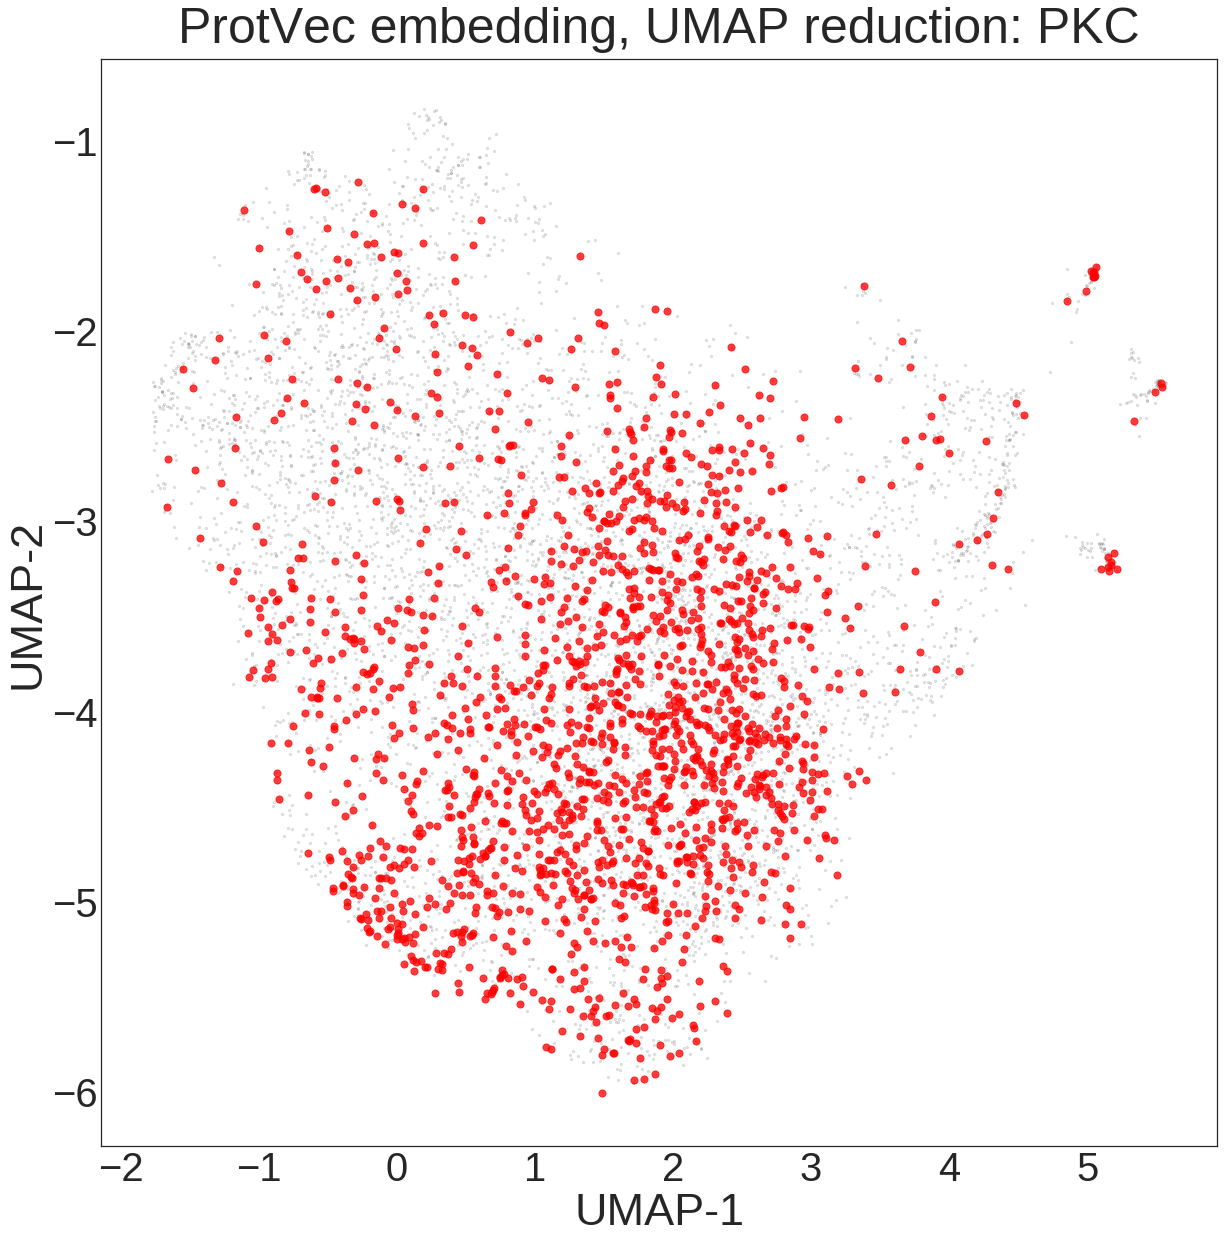

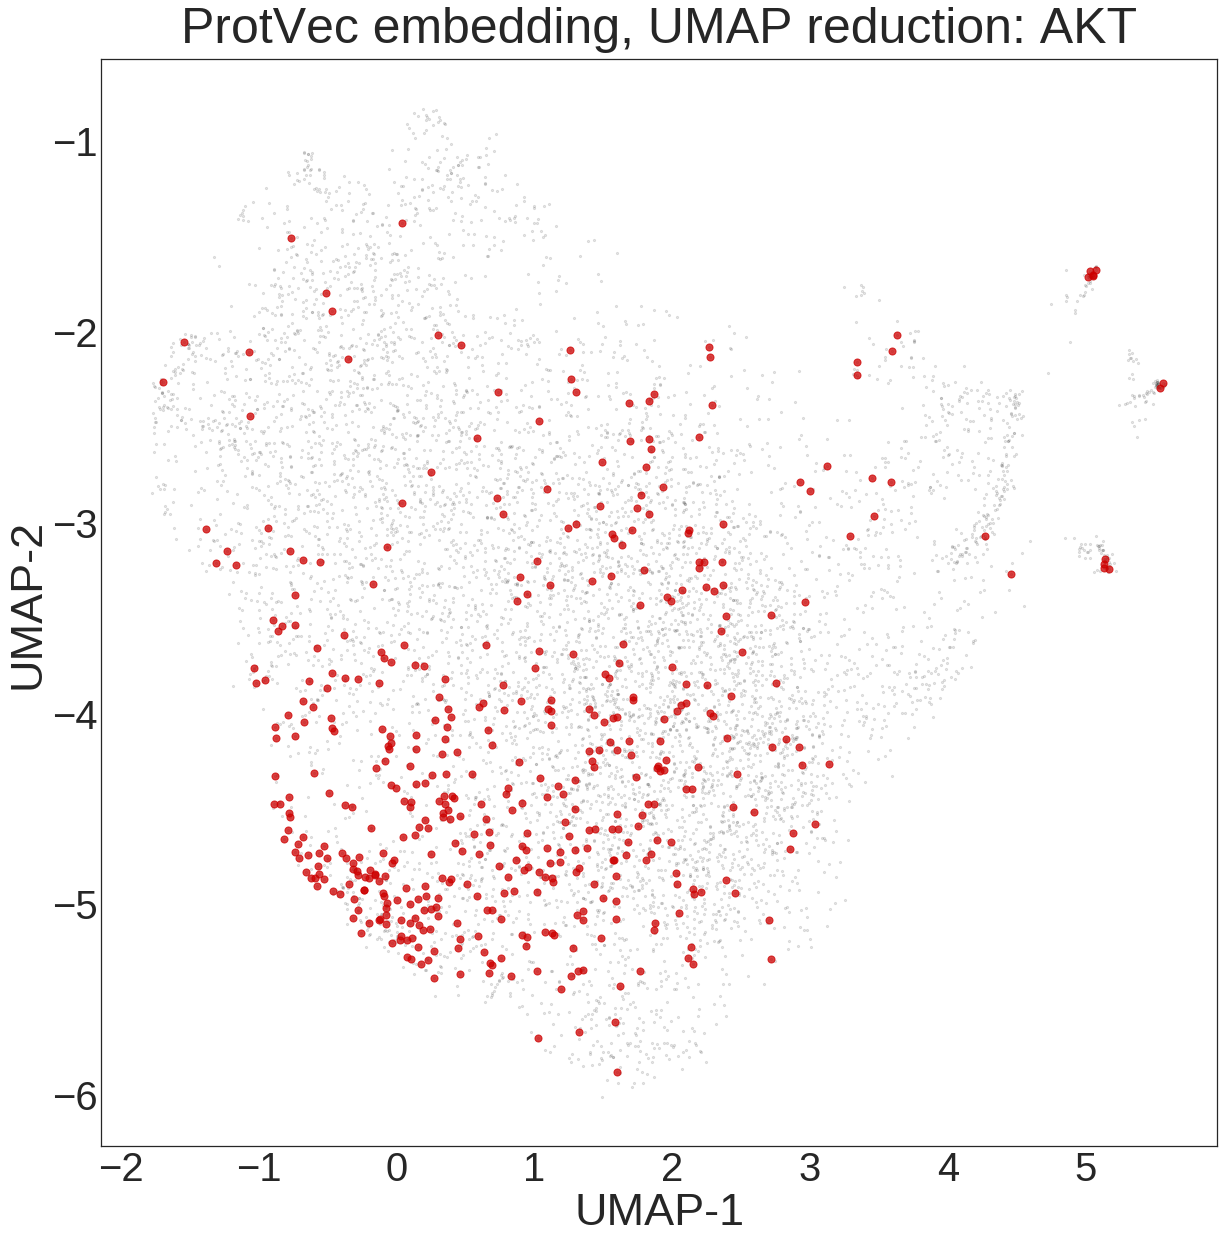

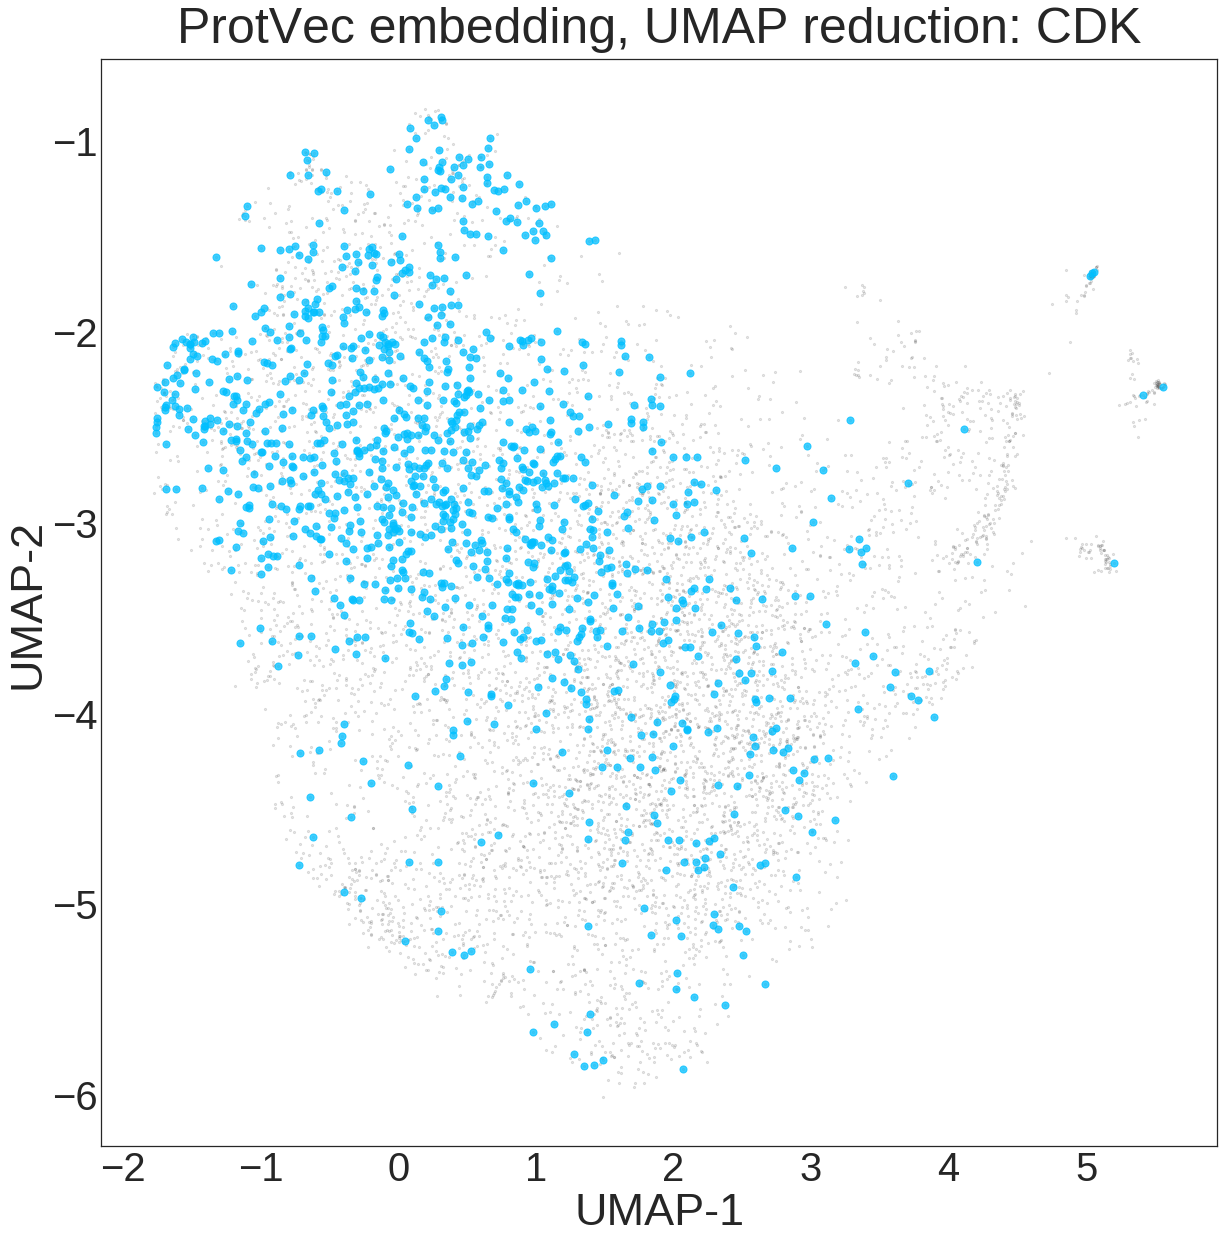

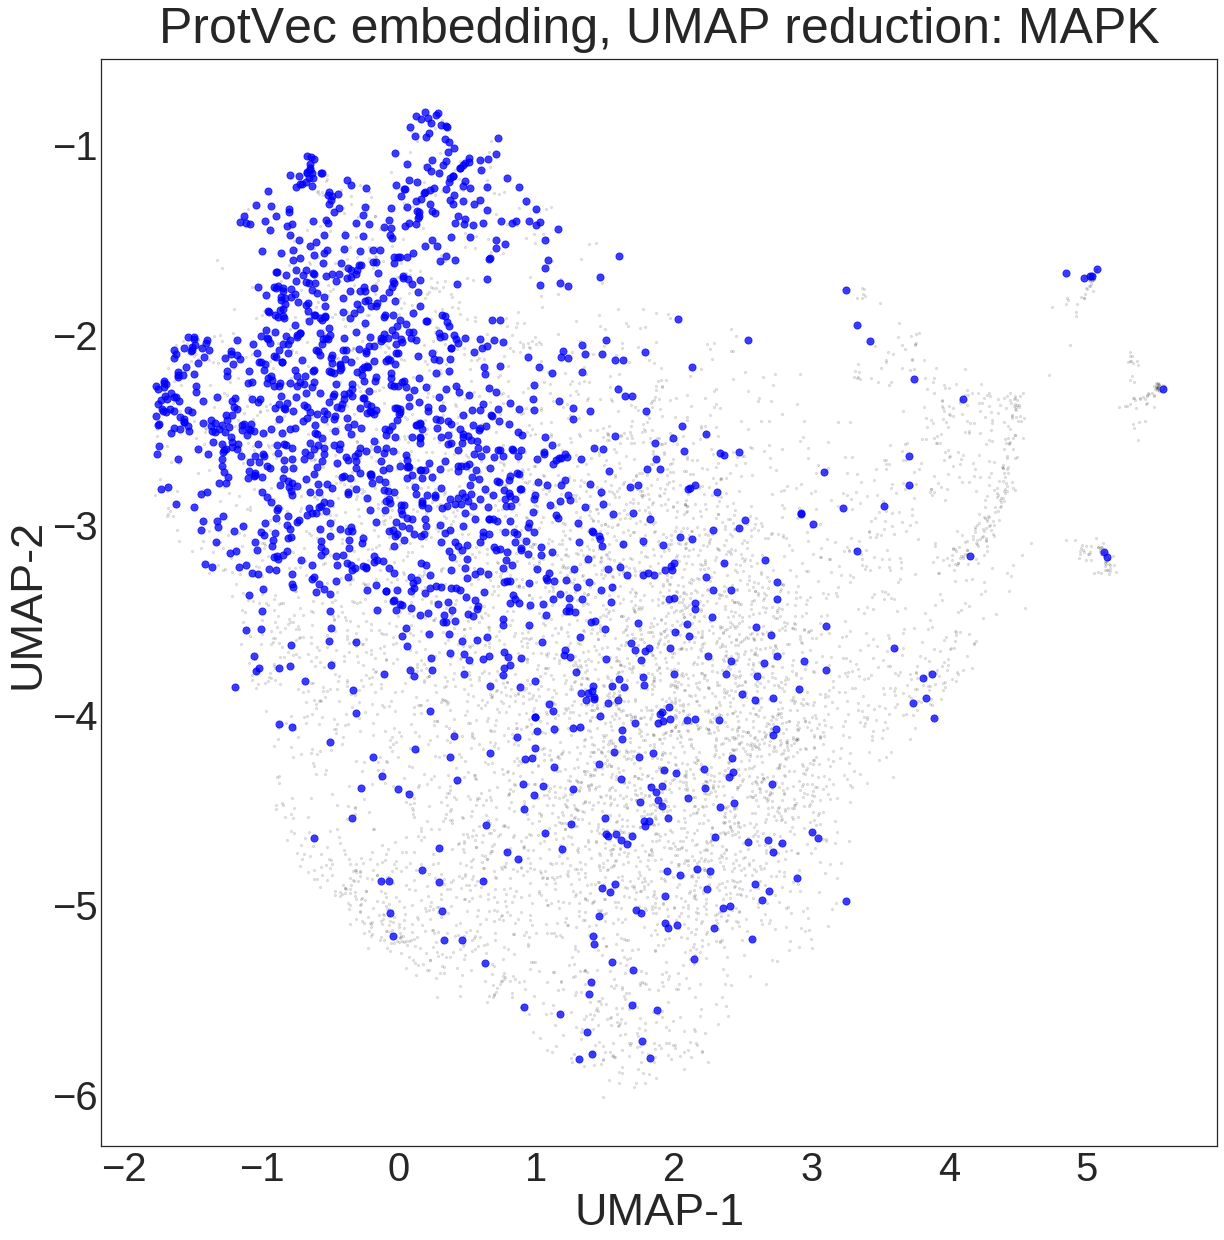

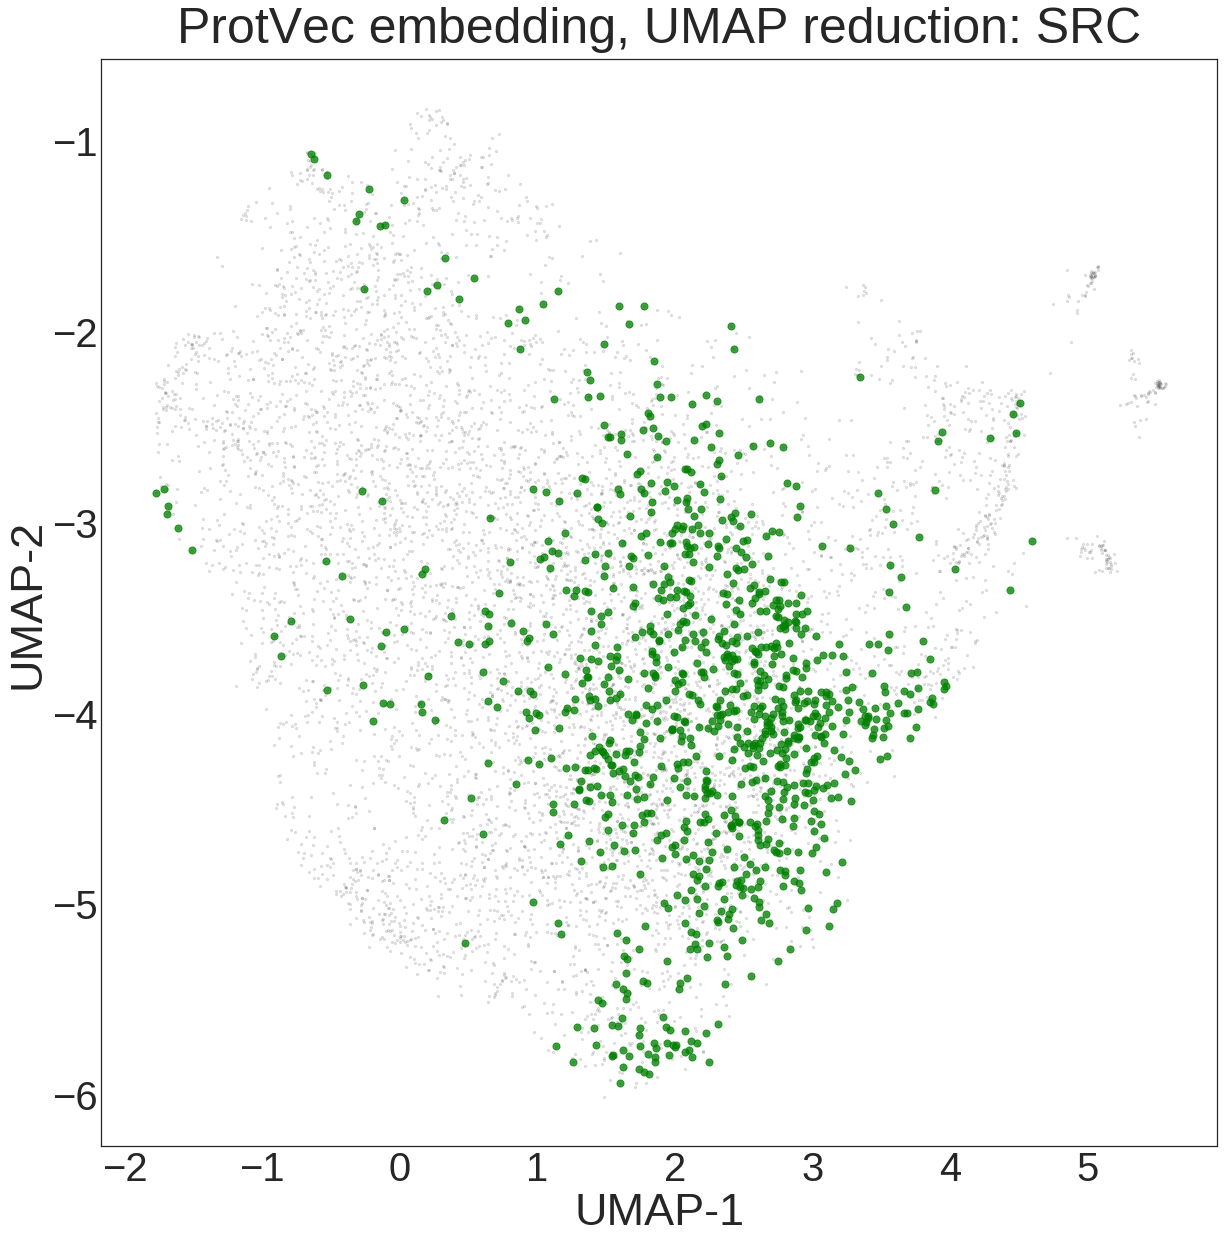

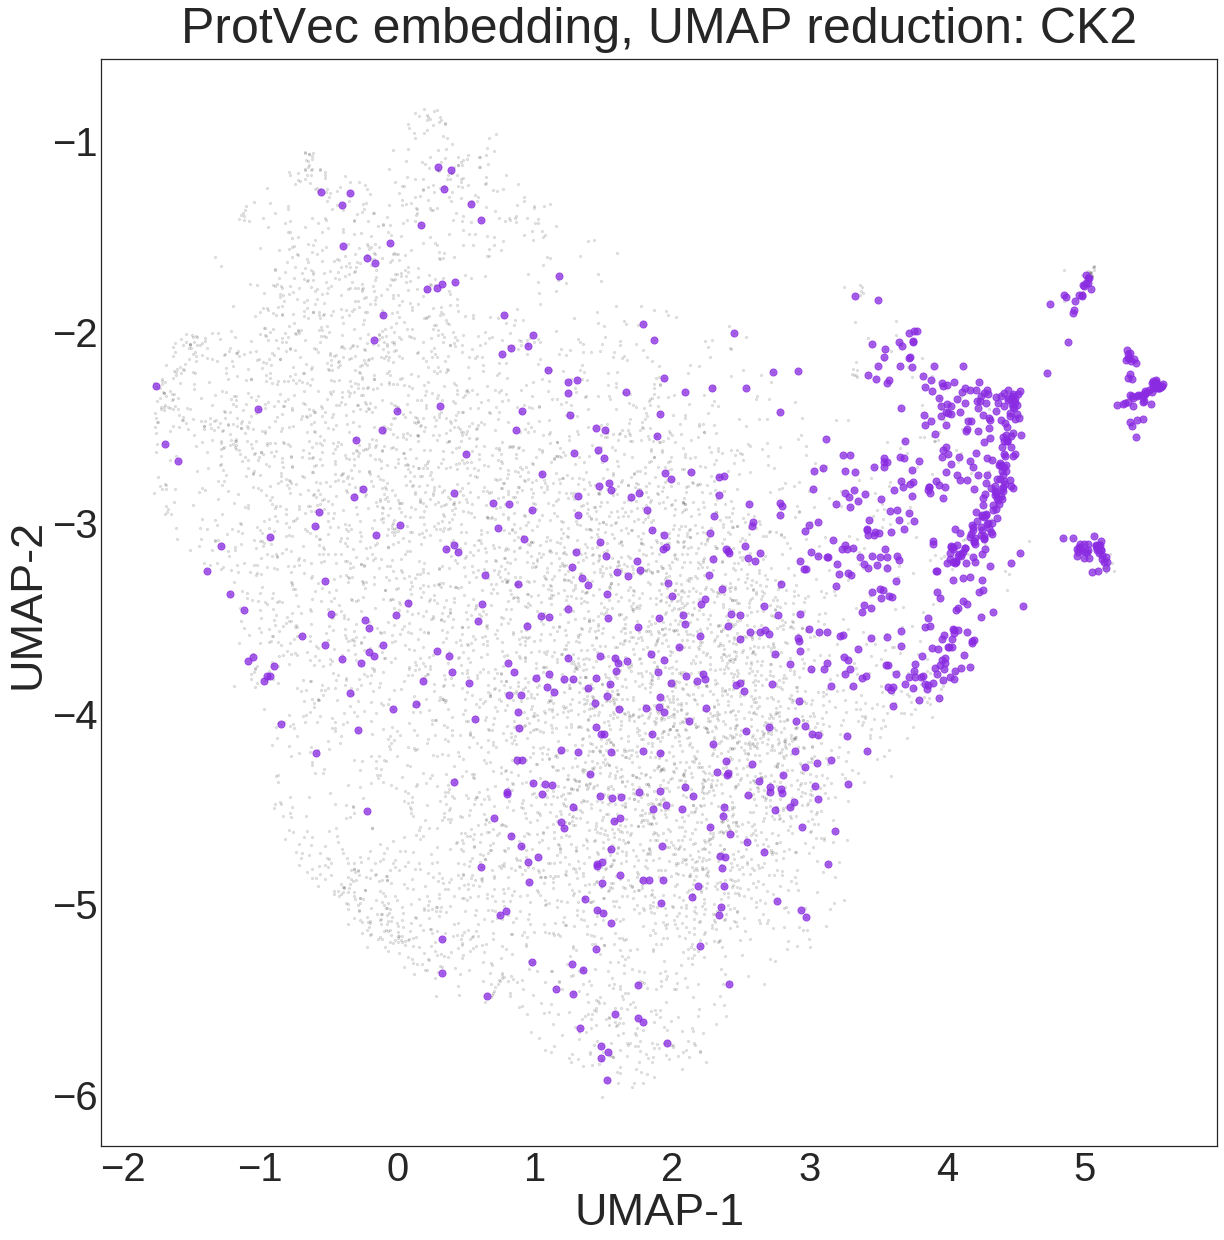

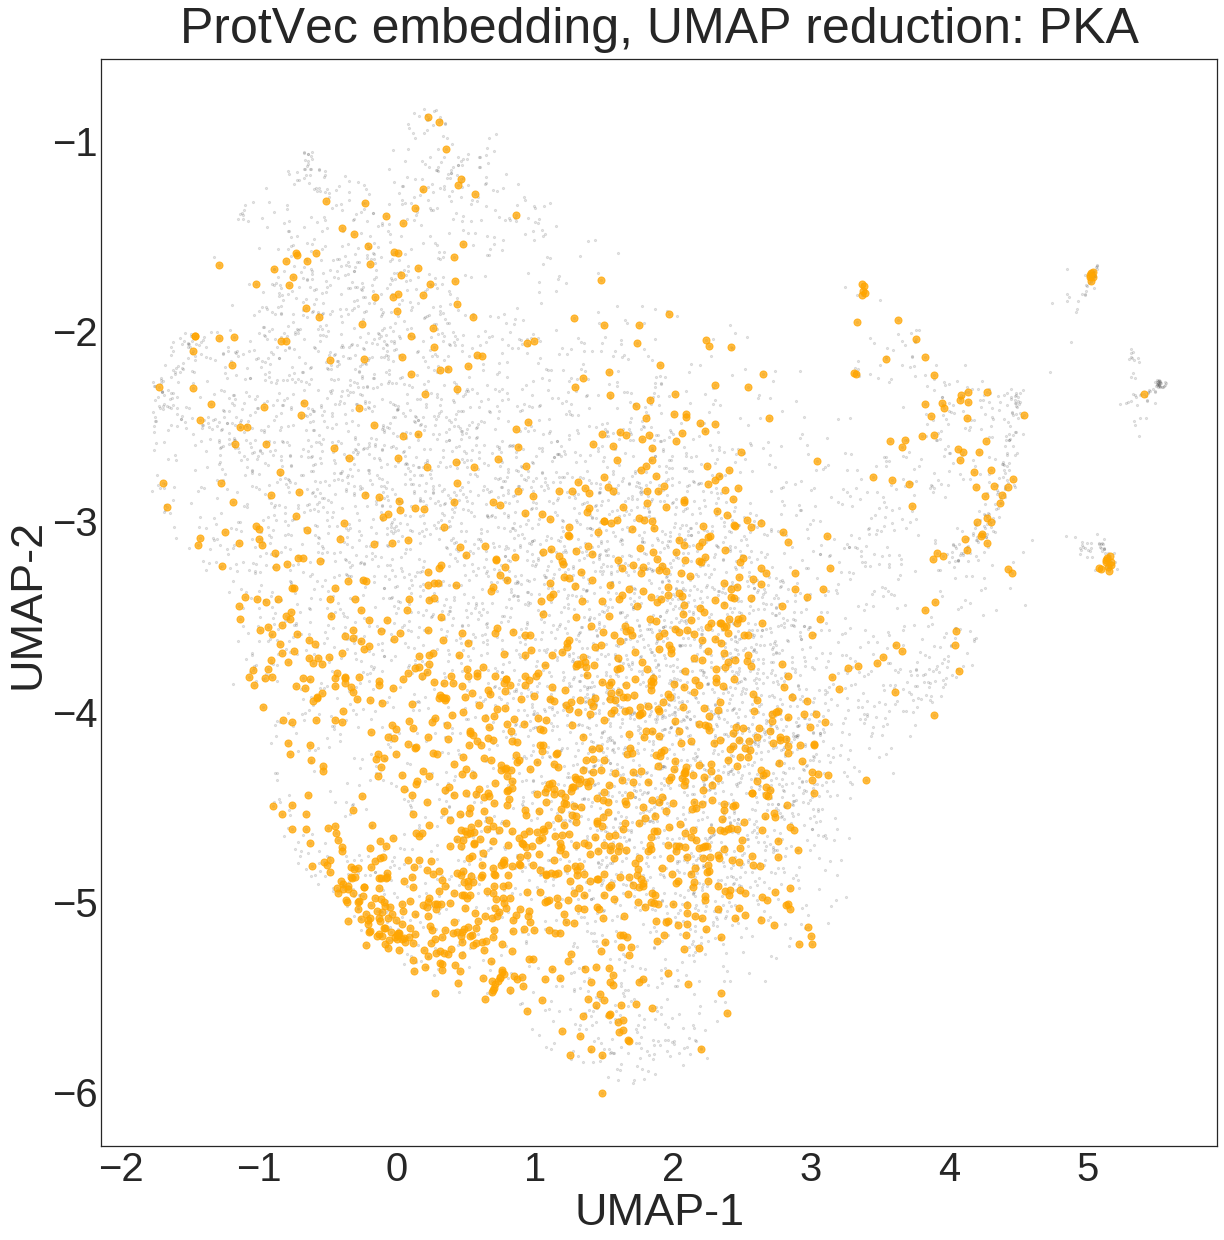

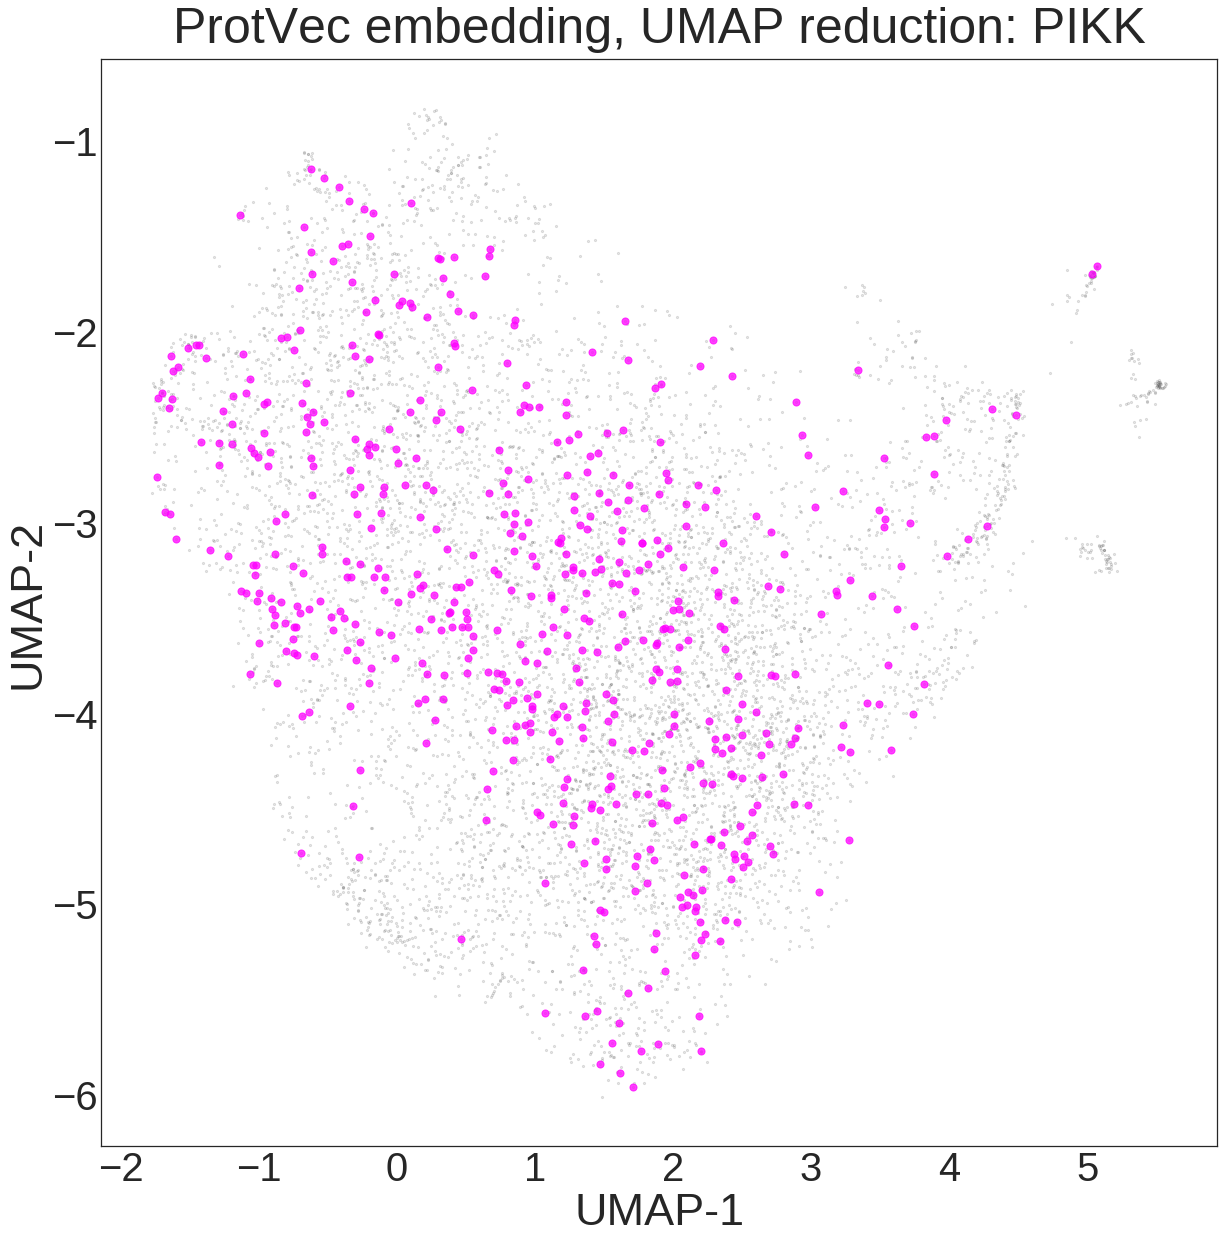

In [70]:
label_size = 45
title_size = 50
tick_size = 40

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

colors = ['red','#CD0000','deepskyblue','blue','green','blueviolet','orange','magenta','blueviolet','violet','deeppink','crimson','mediumslateblue','brown']

plt.figure(figsize=(20,20))
plt.scatter(pos_umap[:, 0], pos_umap[:, 1], marker = 'o',s=5,color='black', alpha=1) #alpha=0.25)
plt.title("ProtVec embedding, UMAP reduction",fontsize=title_size,y=1.01)
plt.xlabel("UMAP-1",fontsize=label_size)
plt.ylabel("UMAP-2",fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

plt.savefig( f + "noHighlights")
plt.show()

pop_fams = ['PKC', 'AKT', 'CDK', 'MAPK', 'SRC', 'CK2', 'PKA', 'PIKK']

i = -1
for _,fam in enumerate(pop_fams):
    
    i+=1
    fIdx = np.where(fams==fam)[0][0]
    plt.figure(figsize=(20,20))
    plt.title(("ProtVec embedding, UMAP reduction: %s" % fam),fontsize=title_size,y=1.01)
    plt.xticks(fontsize=tick_size)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
    plt.yticks(fontsize=tick_size)
    plt.xlabel("UMAP-1",fontsize=label_size)
    plt.ylabel("UMAP-2",fontsize=label_size)
    plt.scatter(pos_umap[:, 0], pos_umap[:, 1], marker = 'o',s=5,color='black',alpha=0.10)
    for mIdx, (x, y) in enumerate(zip(pos_umap[:, 0], pos_umap[:, 1])):
#         if mIdx not in testIdc:
#             continue
#         print(fIdx)
        if motifxFamMatrix[mIdx][fIdx]==1:
            plt.scatter(x,y,marker='o',s=50,c=colors[i],alpha=0.75)          
    plt.savefig((f+"%s" % fam))
    plt.show()